**Brian Blaylock**  
*April 28, 2021*

# ☔ Accumulated Precipitation
Why is accumulated precipitation always zero for the model analysis? [Check out this discussion](https://github.com/blaylockbk/HRRR_archive_download/discussions/10).

> NOTE: When cfgrib reads a grib file with more than one accumulated precipitation field, it will not read all the fields. I think this is an issue with cfgrib ([see issue here](https://github.com/ecmwf/cfgrib/issues/187)). The way around this is to key in on a single APCP field, or to specify the `stepRange` in the backend kwargs.

In [1]:
from hrrrb.archive import xhrrr
from toolbox.cartopy_tools import common_features, pc

In [8]:
h00 = xhrrr('2021-04-28', ':APCP:', fxx=0)
h06 = xhrrr('2021-04-28', ':APCP:', fxx=6)

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [:APCP:] and got [1] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20210428/subset_20210428_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:02.636351
💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [:APCP:] and got [2] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20210428/subset_20210428_hrrr.t00z.wrfsfcf06.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:02.819475


In [9]:
h06.attrs

{'GRIB_edition': 2,
 'GRIB_centre': 'kwbc',
 'GRIB_centreDescription': 'US National Weather Service - NCEP ',
 'GRIB_subCentre': 0,
 'Conventions': 'CF-1.7',
 'institution': 'US National Weather Service - NCEP ',
 'history': {'DATE': Timestamp('2021-04-28 00:00:00'),
  'searchString': ':APCP:',
  'fxx': 6,
  'DATE_is_valid_time': False,
  'remove_grib2': True,
  'add_crs': True,
  'backend_kwargs': {'indexpath': '',
   'read_keys': ['parameterName', 'parameterUnits', 'stepRange'],
   'errors': 'raise'},
  'download_kwargs': {}},
 'url': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20210428/conus/hrrr.t00z.wrfsfcf06.grib2',
 'grid_mapping_name': 'lambert_conformal_conic',
 'standard_parallel': (38.5, 38.5),
 'longitude_of_central_meridian': 262.5,
 'latitude_of_projection_origin': 38.5,
 'crs': <cartopy.crs.LambertConformal at 0x2aebada32590>}

In [3]:
h06.tp.GRIB_stepRange

'0-6'

In [6]:
h06_ = xhrrr('2021-04-28', ':APCP:', fxx=6,
             backend_kwargs=dict(filter_by_keys={'stepRange': '5-6'}))

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [:APCP:] and got [2] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20210428/subset_20210428_hrrr.t00z.wrfsfcf06.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:03.176440


In [5]:
h06_.tp.GRIB_stepRange

'5-6'

In [3]:
dir(h00.hrrrb)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_center',
 '_obj',
 'center',
 'plot']

cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


'plotting!'

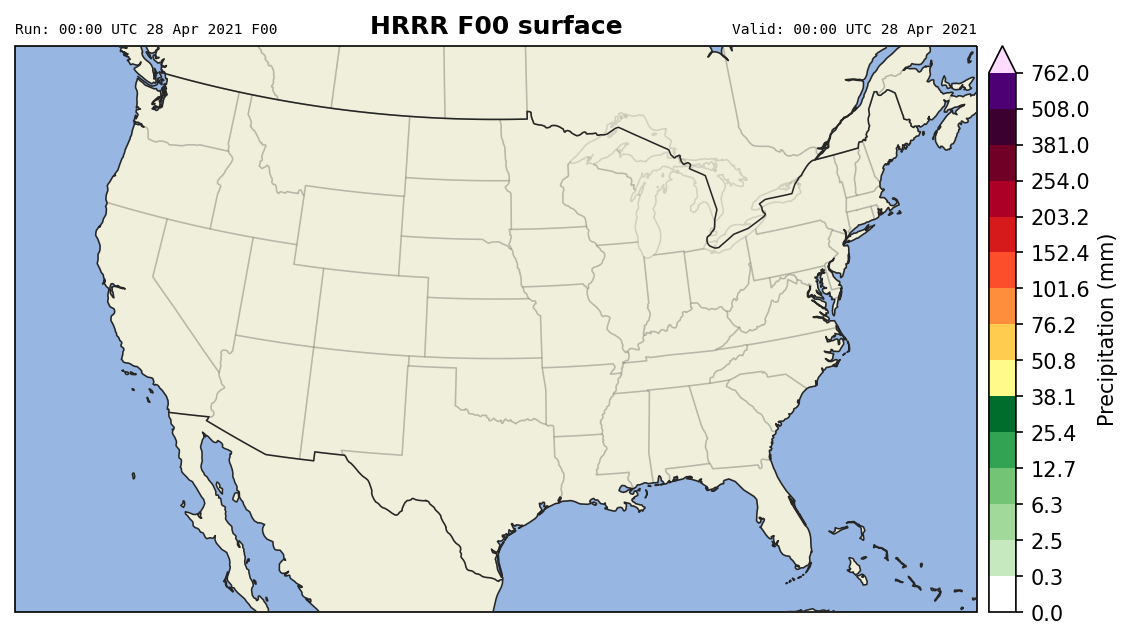

In [3]:
h00.hrrrb.plot(common_features_kw=dict(OCEAN=True, LAND=True))

cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


'plotting!'

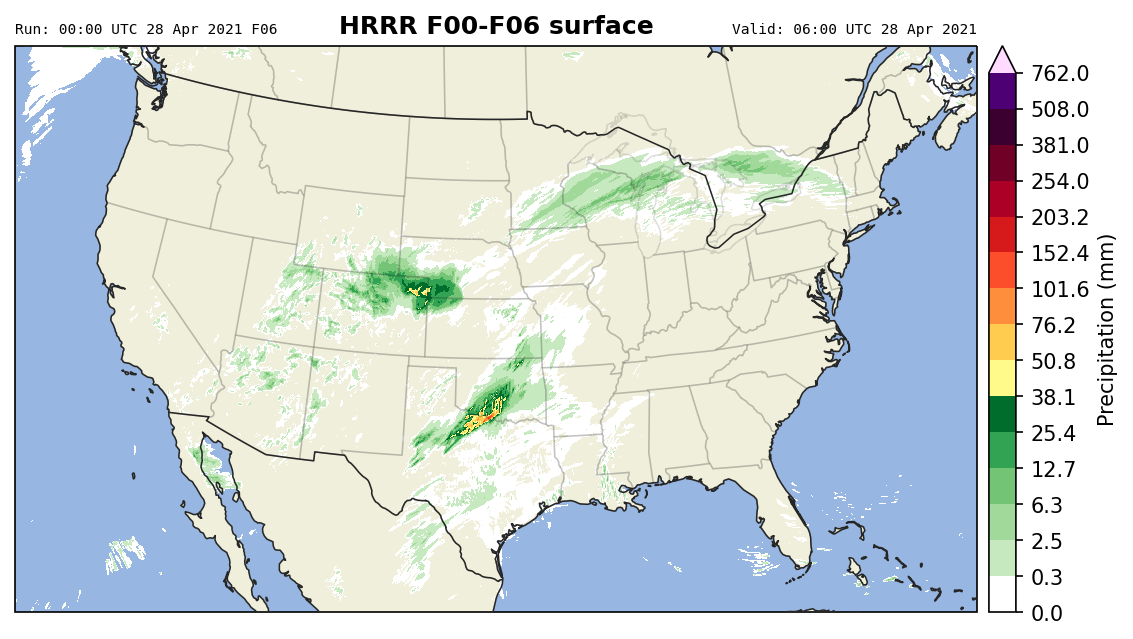

In [4]:
h06.hrrrb.plot(common_features_kw=dict(OCEAN=True, LAND=True))

cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


'plotting!'

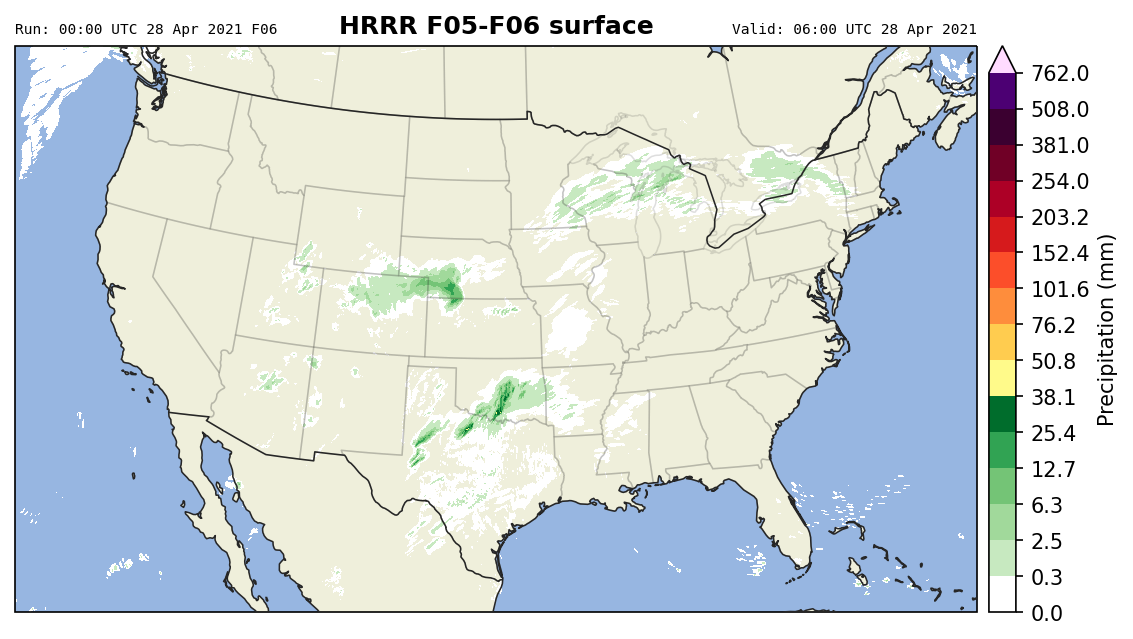

In [11]:
h06_.hrrrb.plot(common_features_kw=dict(OCEAN=True, LAND=True))

In [13]:
'-'.join([f'F{int(i):02d}' for i in h06.tp.GRIB_stepRange.split('-')])

'F00-F06'

In [3]:
href = xhrrr('2021-04-28', ':REFC:')

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [:REFC:] and got [1] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20210428/subset_20210428_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:02.008208


cfgrib variable: refc
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Maximum/Composite radar reflectivity
GRIB_units dB
GRIB_typeOfLevel atmosphere



/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


'plotting!'

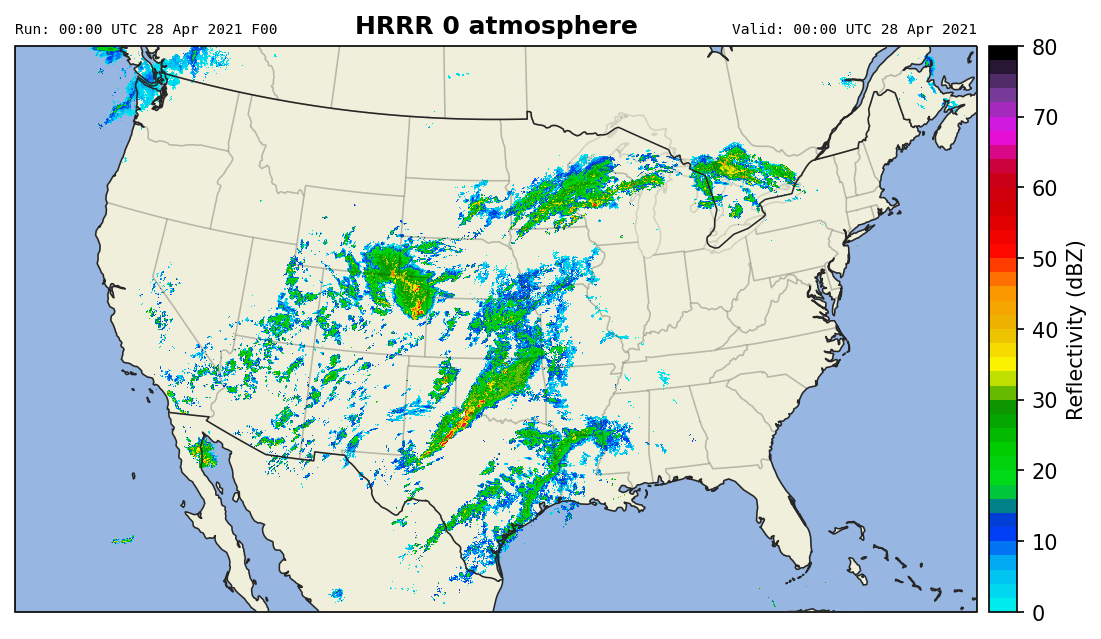

In [28]:
href.hrrrb.plot(common_features_kw=dict(OCEAN=True, LAND=True))

In [29]:
hrate = xhrrr('2019-04-28', ':PRATE:')
hrate1 = xhrrr('2019-04-28', ':PRATE:', fxx=1)

💡 Info: Downloading [1] GRIB2 files

👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/hrrr/20190428]
Download subset from [google]:
✅ Success! Searched for [:PRATE:] and got [1] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20190428/subset_20190428_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:01.614488
💡 Info: Downloading [1] GRIB2 files

Download subset from [google]:
✅ Success! Searched for [:PRATE:] and got [1] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20190428/subset_20190428_hrrr.t00z.wrfsfcf01.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:01.187637


cfgrib variable: prate
GRIB_cfName unknown
GRIB_cfVarName prate
GRIB_name Precipitation rate
GRIB_units kg m**-2 s**-1
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


'plotting!'

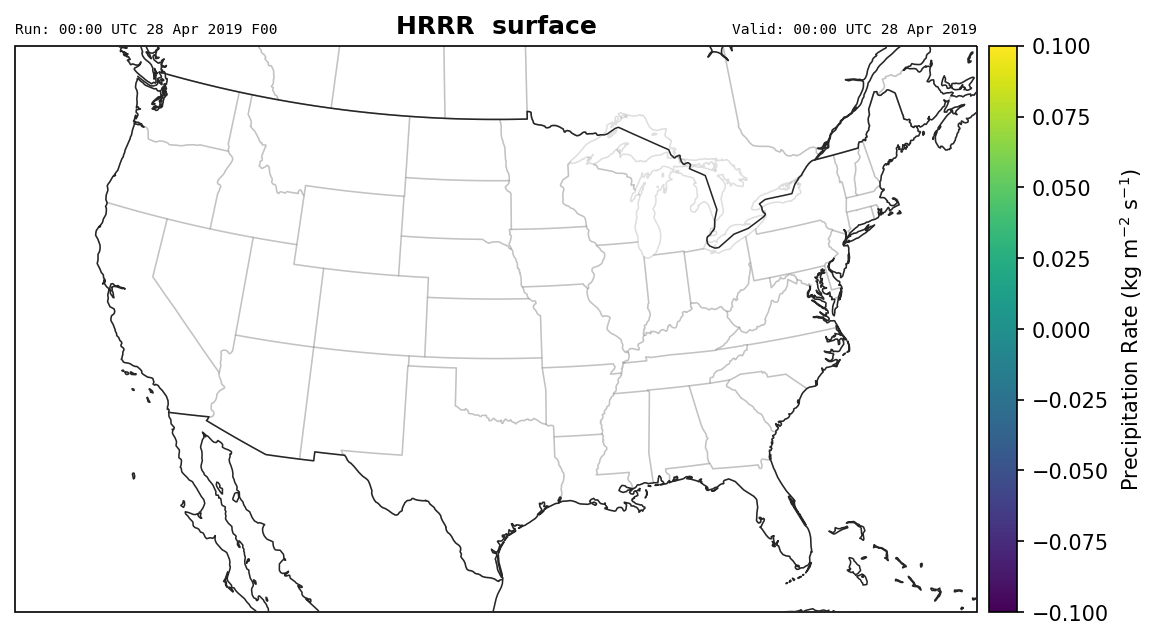

In [30]:
hrate.where(hrate.prate!=0).hrrrb.plot()

cfgrib variable: prate
GRIB_cfName unknown
GRIB_cfVarName prate
GRIB_name Precipitation rate
GRIB_units kg m**-2 s**-1
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


'plotting!'

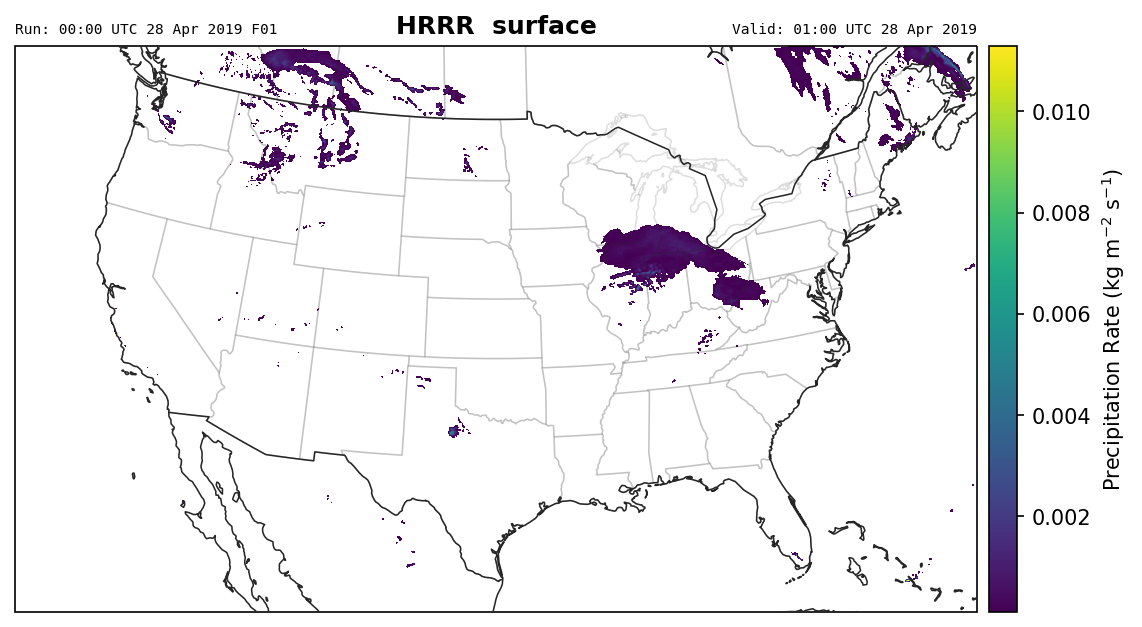

In [31]:
hrate1.where(hrate1.prate!=0).hrrrb.plot()

In [15]:
hrate.prate.attrs

{'GRIB_paramId': 3059,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 1905141,
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'lambert',
 'GRIB_DxInMetres': 3000.0,
 'GRIB_DyInMetres': 3000.0,
 'GRIB_LaDInDegrees': 38.5,
 'GRIB_Latin1InDegrees': 38.5,
 'GRIB_Latin2InDegrees': 38.5,
 'GRIB_LoVInDegrees': 262.5,
 'GRIB_NV': 0,
 'GRIB_Nx': 1799,
 'GRIB_Ny': 1059,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 'prate',
 'GRIB_gridDefinitionDescription': 'Lambert Conformal can be secant or tangent, conical or bipolar',
 'GRIB_iScansNegatively': 0,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 1,
 'GRIB_latitudeOfFirstGridPointInDegrees': 21.138123,
 'GRIB_latitudeOfSouthernPoleInDegrees': 0.0,
 'GRIB_longitudeOfFirstGridPointInDegrees': 237.280472,
 'GRIB_longitudeOfSouthernPoleInDegrees': 0.0,
 'GRIB_missingValue': 9999,
 'GRIB_name': 'Precipitation rate',
 'GRIB_parameterName': 'Precipitation rate ',
 'GRIB_parameterUnits

In [40]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib as mpl

from paint.standard2 import _display_cmap

class cm_reflectivity:
    def __init__(self, vmin=0, vmax=80, levels=40):
        self.levels = levels
        self.name = 'Reflectivity'
        self.units = 'dBZ'
        self.label = f"{self.name} ({self.units})"
        self.COLORS = np.array([
            '#00ecec', '#01b5f3', '#0021f6', '#00de20', '#00cb00', 
            '#079300', '#fdf900', '#ebb700', '#fd9500', '#ff0400', 
            '#d50000', '#c80021', '#ea11f4', '#6e3d90', '#000000'
            ])
        self.bounds = np.linspace(vmin, vmax, levels+1)
        
        if levels is None:
            self.cmap = mcolors.LinearSegmentedColormap.from_list(self.name, self.COLORS)
            self.norm = mcolors.Normalize(self.vmin, self.vmax)
        else:
            self.cmap = mcolors.LinearSegmentedColormap.from_list(self.name, self.COLORS, N=levels)
            self.norm = mcolors.BoundaryNorm(boundaries=self.bounds, ncolors=self.cmap.N)
            
        self.cmap_kwargs = dict(cmap=self.cmap, norm=self.norm)
        self.cbar_kwargs = dict(label=self.label, spacing='proportional')

    def display(self, ax=None, ticklabels=None, fig_kw={}, **kwargs):
        cbar = _display_cmap(ax, ticklabels=ticklabels, fig_kw=fig_kw, **kwargs, **self.cmap_kwargs, **self.cbar_kwargs)
        return cbar
    
class cm_radialvelocity:
    """
    Colormap for radar radial velocity (m/s).
    
    Based on `PyART NWSref colorbar <https://github.com/ARM-DOE/pyart/blob/master/pyart/graph/_cm.py>`_
    """
    def __init__(self, vmin=-20, vmax=20, levels=16):
        self.levels = levels
        self.name = 'Radial Velocity'
        self.units = 'm s$\mathregular{^{-1}}$'
        self.label = f"{self.name} ({self.units})"
        self.COLORS = np.array([
            '#90009f', '#29b72d', '#00ed00', '#00cc00', '#00b100',
            '#008f00', '#0c740c', '#7d9177', '#947a77', '#810303',
            '#a10000', '#bc0000', '#dd0000', '#f30000', '#ff0000'
            ])
        self.bounds = np.linspace(vmin, vmax, levels+1)
        
        if levels is None:
            self.cmap = mcolors.LinearSegmentedColormap.from_list(self.name, self.COLORS)
            self.norm = mcolors.Normalize(self.vmin, self.vmax)
        else:
            self.cmap = mcolors.LinearSegmentedColormap.from_list(self.name, self.COLORS, N=levels)
            self.norm = mcolors.BoundaryNorm(boundaries=self.bounds, ncolors=self.cmap.N)
            
        self.cmap_kwargs = dict(cmap=self.cmap, norm=self.norm)
        self.cbar_kwargs = dict(label=self.label, spacing='proportional')

    def display(self, ax=None, ticklabels=None, fig_kw={}, **kwargs):
        cbar = _display_cmap(ax, ticklabels=ticklabels, fig_kw=fig_kw, **kwargs, **self.cmap_kwargs, **self.cbar_kwargs)
        return cbar

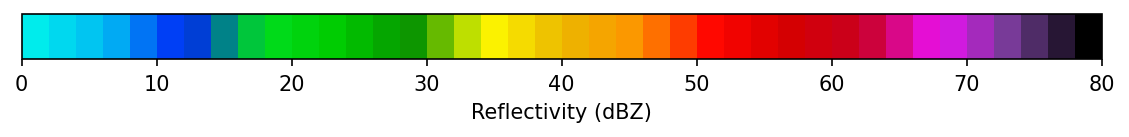

In [41]:
cm_reflectivity().display()

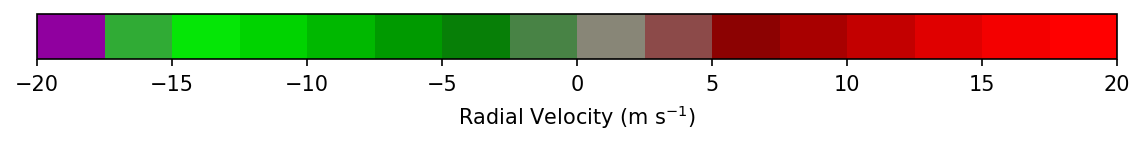

In [42]:
cm_radialvelocity().display()

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [:WEASD:] and got [2] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20210428/subset_20210428_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:02.253135


/p/home/blaylock/BB_python/HRRR_archive_download/hrrrb/archive.py:818: UserWarning: ⚠ ALERT! Could not load grib2 data into a single xarray Dataset. You might consider refining your `searchString` if you are getting data you do not need.
  warnings.warn('⚠ ALERT! Could not load grib2 data into a single '
/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


cfgrib variable: sdwe
GRIB_cfName unknown
GRIB_cfVarName sdwe
GRIB_name Water equivalent of accumulated snow depth (deprecated)
GRIB_units kg m**-2
GRIB_typeOfLevel surface



'plotting!'

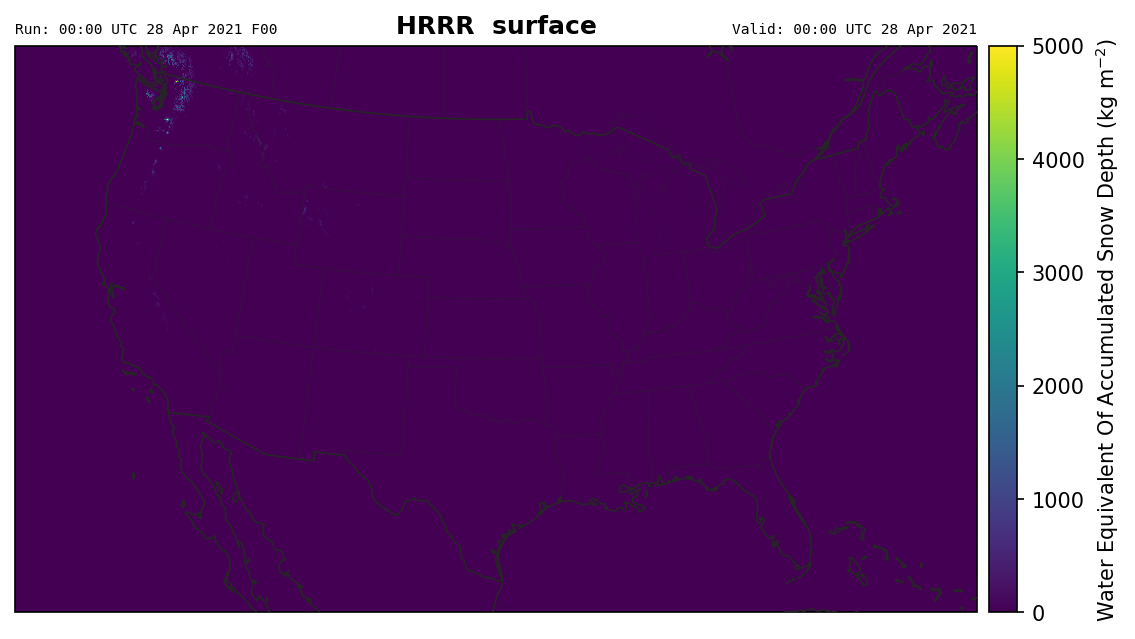

In [36]:
h = xhrrr('2021-04-28', ':WEASD:')
h[0].hrrrb.plot()

cfgrib variable: sdwe
GRIB_cfName unknown
GRIB_cfVarName sdwe
GRIB_name Water equivalent of accumulated snow depth (deprecated)
GRIB_units kg m**-2
GRIB_typeOfLevel surface



'plotting!'

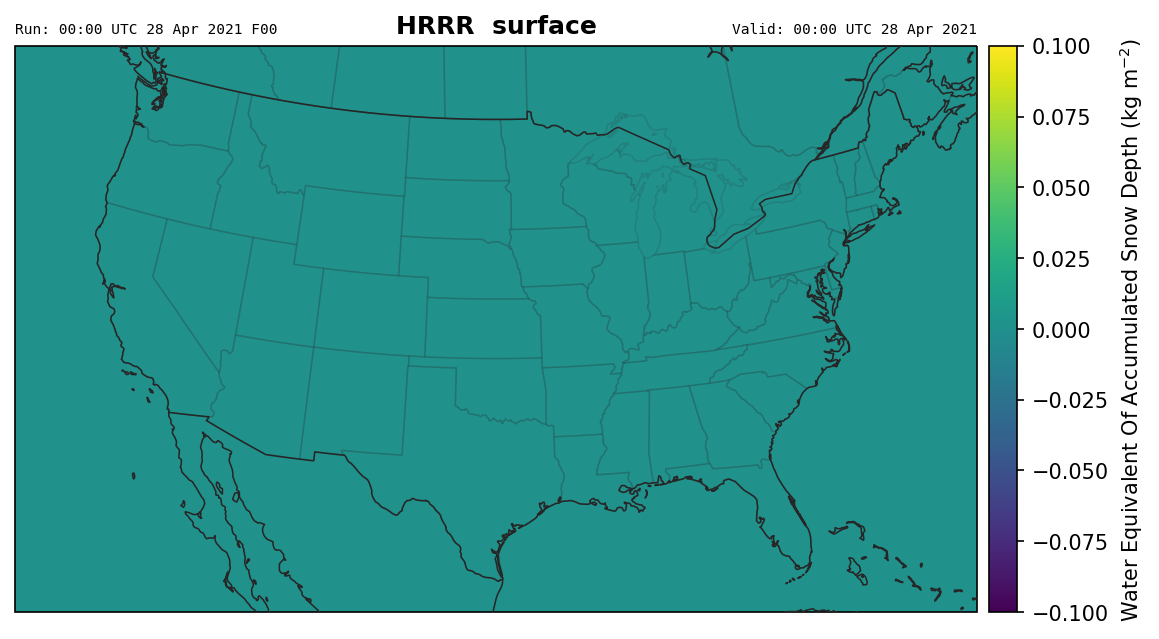

In [37]:
h[1].hrrrb.plot()